 <h1><center>Data mining for a working Cpf1 variant.</center></h1>



<div style="text-align: right">Lorenzo Federico Signorini, 17/09/2019</div>

<div style="text-align: right">Università degli studi di Trento</div>


In [1]:
# First created Thu Jul 11 09:51:15 CEST 2019
# Made by L-F-S
# At the University Of Trento, Italy

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from Bio import SeqIO
from IPython.display import display, HTML
sys.path.insert(0, '/home/lorenzo.signorini/cas_mining/utils/')
import filename_discrepancies
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
from Bio.Align import AlignInfo
from Bio import pairwise2
feature="Cpf1" #WARNING!!! CHANGE THIS!!
outpath="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/"+feature+"/"
datadir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/"



# 1. Data:
## 1.1 load information about SGBs (species)

In [2]:
SGB_table=pd.read_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/S4Segata.csv", index_col=0)
SGB_table.shape

(4930, 10)

There are 4930 different species (SGBs) in the dataset, Let us print the 20 most abundant ones:

In [6]:
SGB_table.sort_values(by="# Reconstructed genomes", ascending=False).head(20)

,SGB ID,# Reconstructed genomes,# Reference genomes,uSGB,Level of estimated taxonomy,Estimated taxonomy,Average distance from closest Reference Genome,Full taxonomic label of the closest genome,Taxonomic assignment based on 16S rRNA sequences (family level),Taxonomic assignment based on 16S rRNA sequences (genus level)
1490,4933,3457,8,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.025725,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Lachnospiracea_incertae_sedis
361,1836,2983,20,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.017564,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Bacteroidaceae,Bacteroides
672,2318,2560,2,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.014071,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Rikenellaceae,Alistipes
438,1934,2169,25,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.013706,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Porphyromonadaceae,Parabacteroides
1024,4285,1925,5,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.024487,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Ruminococcaceae,Ruminococcus
339,1814,1844,15,No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.017179,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,Bacteroidaceae,Bacteroides
4281,15286,1813,0,Yes,Family,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.194245,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Ruminococcaceae,Faecalibacterium
1444,4874,1809,4,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022680,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Fusicatenibacter
1181,4540,1634,10,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022782,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Anaerostipes
1559,5082,1629,4,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,0.022264,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,Lachnospiraceae,Lachnospiracea_incertae_sedis


## 1.2 load information about Cpf1s

In [3]:
cas_dataset=pd.read_csv("/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/known_"+feature+"_variants_table.csv", index_col=0)
cas_dataset.shape

(4821, 15)

There are 4821 Cpf1s in the whole dataset of 154723 genomes.
This dataset was created following step 5, from the original Crisprcas_hits_table.csv. Every line is a different Cpf1. Here is information about the sequence, the contig (piece of contiguous DNA in one genome),  other cas features on the same contig, and phylogenetical information, printed out for the first 10 Cpf1s:

In [4]:
cas_dataset.head(10)

,Contig,Genome Name,SGB ID,Sample Name,Seq,Seq Description,Seq ID,Study,minced_CRISPR,pilercr_CRISPR,prokka_cas1,prokka_cas2,uSGB,Level of estimated taxonomy,Estimated taxonomy
0,NODE_145_length_37113_cov_85.6201,AsnicarF_2017__MV_FEM4_t1Q14__bin.2,1626,MV_FEM4_t1Q14,MAKNFEDFKRLYPLSKTLRFEAKPIGATLDNIVKSGLLDEDEHRAA...,GOFDNDEG_02145 CRISPR-associated endonuclease ...,GOFDNDEG_02145,AsnicarF_2017,"[('.', '26054', '28362')]","[('ID=CRISPR1', '27123', '11')]","[('ID=GOFDNDEG_02143', '28809', '29786')]","[('ID=GOFDNDEG_02142', '28539', '28808')]",No,Species,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
1,NODE_13_length_159619_cov_25.2063,AsnicarF_2017__MV_FEM5_t1Q14__bin.31,5117,MV_FEM5_t1Q14,MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGIIAED...,NFGHHBOA_01649 CRISPR-associated endonuclease ...,NFGHHBOA_01649,AsnicarF_2017,"[('.', '96250', '97226')]","[('ID=CRISPR1', '97226', '14')]","[('ID=NFGHHBOA_01647', '97660', '98622')]","[('ID=NFGHHBOA_01646', '97352', '97627')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
2,NODE_4_length_125474_cov_17.4211,AsnicarF_2017__MV_FEM5_t3Q15__bin.31,5117,MV_FEM5_t3Q15,MNNNTNNSLAPFIGGNSVSKTLRNELRVGSEYTRKHIIEYGIIAED...,KABKEOFJ_00516 CRISPR-associated endonuclease ...,KABKEOFJ_00516,AsnicarF_2017,"[('.', '115601', '116577')]","[('ID=CRISPR1', '116577', '14')]","[('ID=KABKEOFJ_00514', '117011', '117973')]","[('ID=KABKEOFJ_00513', '116703', '116978')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
3,NODE_449_length_38618_cov_7.54389,BackhedF_2015__SID1_M__bin.29,4272,SID1_M,MPININKFSDECRKIDFFTDLYNIQKTLRFSLIPIGATADNFDFKD...,DEDIAKCJ_00748 CRISPR-associated endonuclease ...,DEDIAKCJ_00748,BackhedF_2015,"[('.', '28521', '29380')]","[('ID=CRISPR1', '29380', '10')]","[('ID=DEDIAKCJ_00746', '29786', '30751')]","[('ID=DEDIAKCJ_00745', '29509', '29784')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
4,NODE_89_length_94339_cov_17.7143,BackhedF_2015__SID1_M__bin.4,4348,SID1_M,MKEQFINCYPLSKTLQFSLIPVGKTEDNFNKKLLLERDKQRAENYE...,LJEEDIKG_00997 CRISPR-associated endonuclease ...,LJEEDIKG_00997,BackhedF_2015,"[('.', '938', '1291')]","[('ID=CRISPR1', '1291', '5')]",NaN,NaN,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
5,NODE_283_length_58265_cov_4.32843,BackhedF_2015__SID10_M__bin.32,4933,SID10_M,MDNGTNNFQNFIGISSLQKTLRNALIPTETTQQFIVKNGIIKEDEL...,KKABKEJI_00527 CRISPR-associated endonuclease ...,KKABKEJI_00527,BackhedF_2015,"[('.', '4646', '4997')]","[('ID=CRISPR1', '4997', '4')]",NaN,"[('ID=KKABKEJI_00528', '4245', '4520')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
6,NODE_17_length_151303_cov_20.6282,BackhedF_2015__SID12_M__bin.31,4933,SID12_M,MNNGTNNFQNFIGISSLQKTLRNALIPTETTQQFIVKNGIIKEDEL...,IJHPINHP_00577 CRISPR-associated endonuclease ...,IJHPINHP_00577,BackhedF_2015,NaN,NaN,NaN,NaN,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
7,NODE_9375_length_3304_cov_2.83903,BackhedF_2015__SID128_12M__bin.34,5075,SID128_12M,MEKTRDNARKNWQEIGKIKDVKSGYLSGVISEIARMVIDYNAIIVM...,BAFDKJIF_01943 CRISPR-associated endonuclease ...,BAFDKJIF_01943,BackhedF_2015,NaN,NaN,"[('ID=BAFDKJIF_01944', '1231', '1761')]","[('ID=BAFDKJIF_01945', '1778', '2053')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
8,NODE_6_length_334031_cov_12.9976,BackhedF_2015__SID128_12M__bin.54,4933,SID128_12M,MNNGTNNFQNFIGISSLQKTLRNALIPTETTQQFIVKNGIIKEDEL...,HNIILJJD_00112 CRISPR-associated endonuclease ...,HNIILJJD_00112,BackhedF_2015,"[('.', '114440', '115482')]","[('ID=CRISPR1', '115418', '13')]",NaN,"[('ID=HNIILJJD_00113', '113876', '114313')]",No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
9,NODE_57_length_112823_cov_12.5651,BackhedF_2015__SID128_M__bin.11,4914,SID128_M,MNYKTGLEDFIGKESLSKTLRKALIPTESTKIHMEEMGVIRDDELR...,BLKIGNGG_00857 CRISPR-associated endonuclease ...,BLKIGNGG_00857,BackhedF_2015,"[('.', '15574', '15867')]","[('ID=CRISPR1', '15867', '5')]",NaN,NaN,No,Species,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...


In [5]:
cas_dataset.head(10)['minced_CRISPR']

0      [('.', '26054', '28362')]
1      [('.', '96250', '97226')]
2    [('.', '115601', '116577')]
3      [('.', '28521', '29380')]
4         [('.', '938', '1291')]
5        [('.', '4646', '4997')]
6                            NaN
7                            NaN
8    [('.', '114440', '115482')]
9      [('.', '15574', '15867')]
Name: minced_CRISPR, dtype: object

## 1.3. Initial Cpf1 lengths distribution

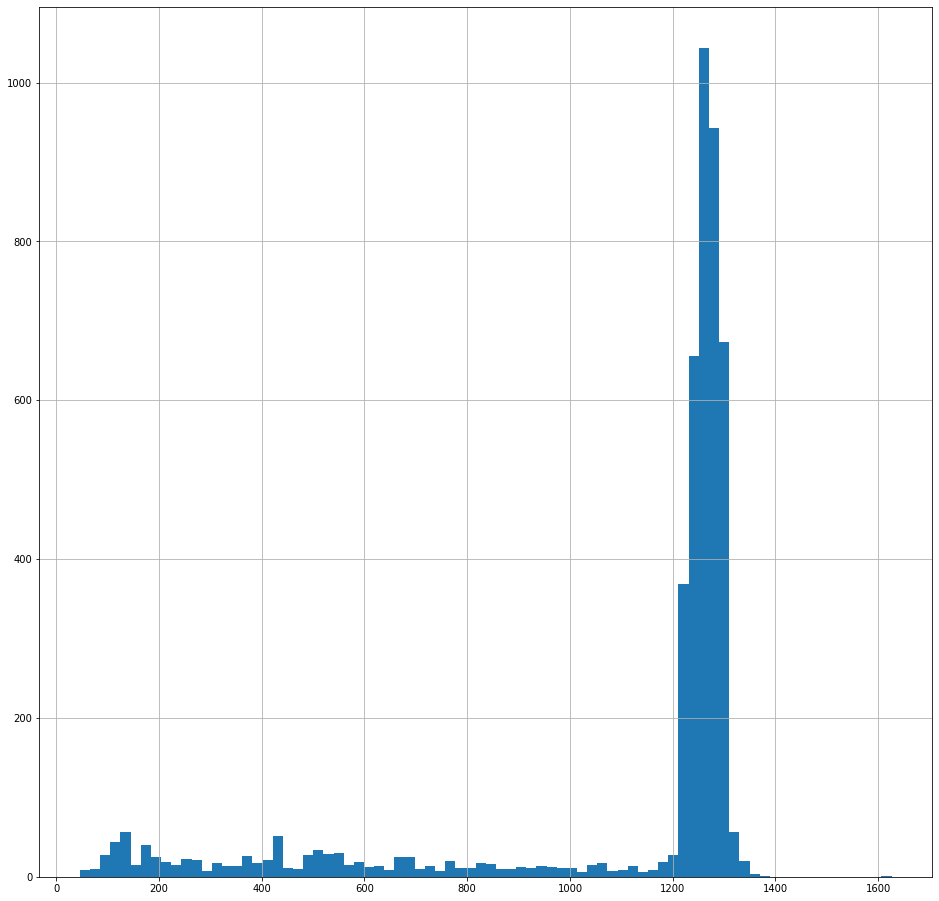

In [28]:
counts=cas_dataset["Seq"].str.count("")
counts.hist(bins=80, figsize=(20*0.8,20*0.8))

The distribution of lengths for Cpf1 presents a sharp peak around 1300 amino acids, and a left tail which is probably annotation noise.

In [29]:
counts.max()

1626

# 2. Data filtering: Extract a list of the shortest working cpf1 from most abundant and most unknown genomes.

## 2.1 Filter by: active locus
An active locus is defined by having at least 1 CRISPR array, 1 Cas1, 1 Cas2, and 1 effector Cas

In [6]:
# Checking that the next step actually does work properly:
# If there are no NaNs values in columns ["Estimated taxonomy","Level of estimated taxonomy", "SGB ID",
#                                            "Sample Name", "Study", "Genome Name", "Contig", "Seq", 
#                                            "Seq Description", "Seq ID"],
# then, it returns True
temp=cas_dataset[cas_dataset.isna().any(axis=1)] #display rows with at least 1 Nan value: You can use DataFrame.any with parameter axis=1 for check at least one True in row by DataFrame.isna with boolean indexing:
#temp[temp["thing"]==None].shape returns a tuple ()
temp[temp["Estimated taxonomy"]==None].shape==temp[temp["Level of estimated taxonomy"]==None].shape==\
temp[temp["uSGB"]==None].shape==temp[temp["SGB ID"]==None].shape==temp[temp["Sample Name"]==None].shape==\
temp[temp["Study"]==None].shape==temp[temp["Genome Name"]==None].shape==temp[temp["Contig"]==None].shape==\
temp[temp["Seq"]==None].shape==temp[temp["Seq Description"]==None].shape==temp[temp["Seq ID"]==None].shape==\
(0,15)

True

In [7]:
del temp

In [9]:
#Drop Nan rows
activecas=cas_dataset.dropna(how="any")
print(activecas.shape)

(1826, 15)


There are 1826 active loci. Let us print the lengths distribution of cas9 in these loci:

## 2.2 Filter by: working active locus
A working locus is defined by being an active locus with a Cas9 of a length falling within the peak of the distribution

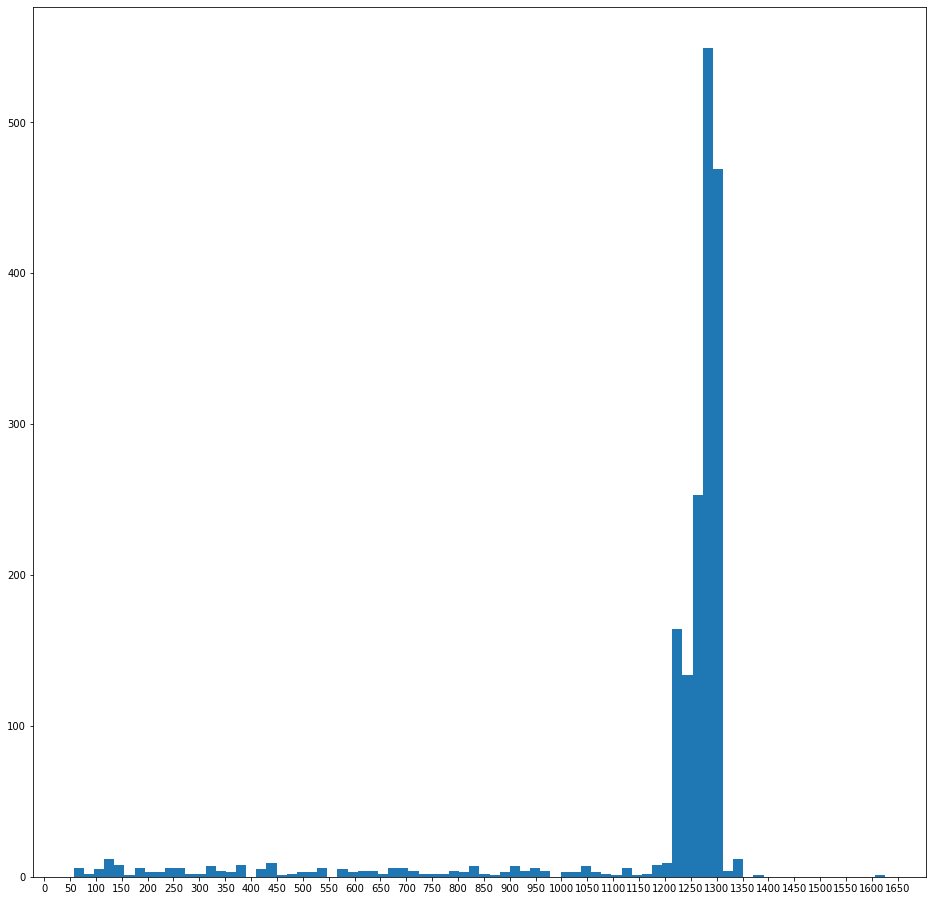

In [33]:
activecas_counts=activecas["Seq"].str.count("")
plt.figure(figsize=(20*0.8,20*0.8))
plt.hist(activecas_counts ,bins=80)
plt.xticks(np.arange(0, 1700, step=50))
print()

The length intreval where there seems to be a working protein is around (1050,1170) , (1330,1450) and maybe (1500,1580). We shall define these intrevals as working lengths.

## 2.3-2.4 Filter by: sequence length of 1210-1280 amino acid, unknown SGB
An unknown SGB is an SGB with no reference genome in literature.

In [19]:
length_min=1210
length_max=1280

In [20]:
sorted_activecas_counts=activecas["Seq"].str.count("").sort_values()
working_intreval=sorted_activecas_counts[sorted_activecas_counts>=length_min]
working_intreval=working_intreval[working_intreval<=length_max]
active_working_cas=activecas.loc[working_intreval.index]
active_working_unknwon_cas=active_working_cas[active_working_cas.uSGB=="Yes"]
active_working_unknwon_cas.shape

(162, 15)

There are 225 active and working Cpf1s from unknown species.

## 2.5 Filter by: most abundant SGB 

Let us check which SGBs are the most abundant among the Cas loci we have filtered so far.

In [23]:
genomes_in_SGB={}
for n, cas_series in active_working_unknwon_cas.iterrows():
    if not cas_series["SGB ID"] in genomes_in_SGB.keys():
         genomes_in_SGB[cas_series["SGB ID"]]=[]
    genomes_in_SGB[cas_series["SGB ID"]].append(cas_series["Genome Name"])
genomes_in_SGB2={SGB:len(np.unique(genomenames)) for (SGB, genomenames) in genomes_in_SGB.items()}
SGB_abundance_in_dataset=pd.Series(genomes_in_SGB2, index=genomes_in_SGB.keys(), name="# Genomes with act. wrk. cas").sort_values(ascending=False).rename_axis('SGB ID')
SGB_rel_ab_in_dataset=pd.DataFrame(SGB_table[SGB_table["SGB ID"].isin(SGB_abundance_in_dataset.index)][["SGB ID","# Reconstructed genomes"]])
SGB_abundance=pd.DataFrame(SGB_abundance_in_dataset).merge(SGB_rel_ab_in_dataset, left_on='SGB ID', right_on='SGB ID')
SGB_abundance["Genomes relative abundance"]=SGB_abundance["# Genomes with act. wrk. cas"]/SGB_abundance["# Reconstructed genomes"]
SGB_abundance.head(15)

,SGB ID,# Genomes with act. wrk. cas,# Reconstructed genomes,Genomes relative abundance
0,6308,43,217,0.198157
1,4335,22,169,0.130178
2,1472,14,171,0.081871
3,6273,6,12,0.500000
4,4350,4,45,0.088889
5,4316,3,33,0.090909
6,2021,3,161,0.018634
7,1617,3,75,0.040000
8,8619,3,17,0.176471
9,1473,3,12,0.250000


In [25]:
#SGB_abundance_in_dataset=active_working_unknwon_cas.groupby(["SGB ID"]).count().sort_values(by="Seq ID", ascending=False)["Seq ID"].head(15)
#SGB_abundance_in_dataset=SGB_abundance_in_dataset.rename("# Genomes with act. wrk. cas9")
#SGB_rel_ab_in_dataset=pd.DataFrame(SGB_table[SGB_table["SGB ID"].isin(SGB_abundance_in_dataset.index)][["SGB ID","# Reconstructed genomes"]])
#SGB_abundance=pd.DataFrame(SGB_abundance_in_dataset).merge(SGB_rel_ab_in_dataset, left_on='SGB ID', right_on='SGB ID')
#SGB_abundance["Genomes relative abundance"]=SGB_abundance["# Genomes with act. wrk. cas9"]/SGB_abundance["# Reconstructed genomes"]
#SGB_abundance

All SGBs have a pretty low relative abundance. The highest relative abundance is 0.5 in SGB 6273.


Let us keep all the loci from the SGBs with 10 or more genomes (each one of these genomes contains a working, active cas9 and belongs to the same species), plust SGB 6273.

But, first, let's check whether all samples are coming from different datasets:

In [26]:
#returns SGBs with samples that only come from one dataset, if any.
for SGB in SGB_abundance_in_dataset.index:
    first_dataset=True
    diff=False
    for ind, Cas9 in active_working_unknwon_cas.iterrows():
        if Cas9["SGB ID"]==SGB:
            dataset=Cas9["Genome Name"].split("__")[0]
            if not first_dataset:
                if dataset != temp_unique_dataset:
                    diff=True
            else:
                temp_unique_dataset=dataset
                first_dataset=False
    if not diff:
        print("SGB",SGB,"genomes all come from dataset",dataset)

                

SGB 8619 genomes all come from dataset BritoIL_2016
SGB 1668 genomes all come from dataset BritoIL_2016
SGB 3940 genomes all come from dataset XieH_2016
SGB 3926 genomes all come from dataset FengQ_2015


In [27]:
chosen_SGBs=[6308,4335,1472,6273]
abundance="5_most_abundant_and_6273"

# 3 Data Clustering
## 3.1 Cluster together identical sequences in the same SGB
for the most abundant unknown SGBs with a working active Cpf1a

In [30]:
lengths_intreval=str(length_min)+"-"+str(length_max)
def seq_getter(s): return str(s.seq)
cons_table=""
for SGB in chosen_SGBs:
    current_SGB=active_working_unknwon_cas[active_working_unknwon_cas["SGB ID"]==SGB]
    alignments=[]
    for index, row in current_SGB.iterrows():
        tempseq=SeqRecord(Seq(row.Seq), id=str(row["SGB ID"])+"__"+row["Seq ID"]+"__"+row["Genome Name"], description=row["Genome Name"]+"__"+row["Seq ID"]+"__"+str(row["SGB ID"]))
        alignments.append(tempseq)

    #write fasta for every SGB
    filename="SGB"+str(SGB)
    SeqIO.write(alignments, outpath+filename+".faa", "fasta")
    
    #read from that fasta and group identical sequences somehow
    fastafile=outpath+filename+".faa"
    records = list(SeqIO.parse(fastafile,'fasta'))    
    records.sort(key=seq_getter)
    n=0
    for seq,equal in groupby(records, seq_getter):
        ids = ';'.join(s.id for s in equal)
        N=ids.count(';')+1
        
        line=">"+ids+";length"+str(len(seq))+";#sequences"+str(N)+"\n"+seq+"\n"
        cons_table+=line
filename2= outpath+lengths_intreval+"_aa_"+feature+"_sequences_from_active_loci_from_"+abundance+"_most_unknown_species_identical"       
f=open(filename2+".faa","w")
f.write(cons_table)
f.close()
sequences=list(SeqIO.parse(outpath+lengths_intreval+"_aa_"+feature+"_sequences_from_active_loci_from_"+abundance+"_most_unknown_species_identical.faa",'fasta'))
print("There are", len(sequences),"unique sequences")# clusters","("+str(len(without_9710))+" without 9710 SGB) at "+identity_score+" identity.")


There are 32 unique sequences


## 3.3 Sequences clustering
Cluster together sequences of up to 97[0,3,5,9]% similarity, and extract one representative sequence for each cluster.
Different clustering algorithms are available,the one that works the easiest was fast uclust https://drive5.com/usearch/manual/uclust_algo.html. Uclust performs centroid-based clustering and returns the centroid of each cluster as representative sequence.

Run:


In [32]:
print("usearch -cluster_fast",filename2+".faa -id 0.97 -centroids 1aCsfalf5mamusi_centroid97.faa -uc clusters.uc")

usearch -cluster_fast /shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/Cpf1/1210-1280_aa_Cpf1_sequences_from_active_loci_from_5_most_abundant_and_6273_most_unknown_species_identical.faa -id 0.97 -centroids 1aCsfalf5mamusi_centroid97.faa -uc clusters.uc


mv 1aCsfalf5mamusi_centroid97.faa 97_clusters/


uclust output parsing

In [34]:
clusters_filename="1aCsfalf5mamusi_centroid"

In [37]:
for identity_score in ["97"]:#["90", "93","95","97", "99"]:
    n_cluster_per_SGB=[]
    for record in SeqIO.parse(outpath+identity_score+"_clusters/"+clusters_filename+identity_score+".faa",'fasta'):       
        SGBsnames=[oneid[:6].rstrip("__") for oneid in record.id.split(";")]
        SGBsnames=np.unique(SGBsnames) 
        SGBsnames=",".join(SGBsnames)
        n_cluster_per_SGB.append(SGBsnames)
    print("There are", len(n_cluster_per_SGB), "sequence clusters"+" at "+identity_score+" identity.")
    print("SGB(s)\t# Sequence clusters\n---------------------------")
    print(pd.Series(n_cluster_per_SGB).value_counts(),"\n")

There are 9 sequence clusters at 97 identity.
SGB(s)	# Sequence clusters
---------------------------
#seque,1472,length    6
#seque,6308,length    1
#seque,4335,length    1
#seque,6273,length    1
dtype: int64 



# 4 MSalignment with known sequences

perform pairwise alignment of cluster centroids with known workingcas9s. And visualize them nicely.

In [2]:
# build a fasta file of the things to be aligned against from the uniprot database

In [3]:
# merge the fastas together
identity_score='97'
ref_fasta="uniprot_"+feature+".fasta"
alignname="MSA_clusters_"+feature+"_"+identity_score+"_and_ref"

In [66]:
alignments=[]
for row in list(SeqIO.parse(outpath+identity_score+"_clusters/"+clusters_filename+identity_score+".faa",'fasta'))+list(SeqIO.parse(outpath+ref_fasta, 'fasta')):
    tempseq=SeqRecord(row.seq, id=row.id)
    alignments.append(tempseq)

SeqIO.write(alignments, outpath+identity_score+"_clusters/"+alignname+".faa", "fasta")

16

In [67]:
#alignname="9aCsfalf1musi_centroid95.faa" #TODO temp
cline= ClustalwCommandline("clustalw", infile=outpath+identity_score+"_clusters/"+alignname+".faa", outfile=outpath+identity_score+"_clusters/"+alignname+".aln")
print(cline)
os.system(str(cline))

clustalw -infile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/Cpf1/97_clusters/MSA_clusters_Cpf1_97_and_ref.faa -outfile=/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/5caslocitable/out/Cpf1/97_clusters/MSA_clusters_Cpf1_97_and_ref.aln


0

# Build maximum likelihood tree out of the multiple sequence alignments

In [1]:
# go on your laptop open MEGA and build it

# Build a score matrix

In [4]:
from Bio import pairwise2
import  Bio.SubsMat.MatrixInfo as mx

In [7]:
help(mx)

Help on module Bio.SubsMat.MatrixInfo in Bio.SubsMat:

NAME
    Bio.SubsMat.MatrixInfo - Substitution matrices for use in alignments, etc.

DESCRIPTION
    The information on this page was originally obtained from Dr. Gerhard Vogt's
    page http://www.embl-heidelberg.de/~vogt/matrices/mlist1.html (dead link),
    and was extracted using a script.
    
    You can view an archive copy of this webpage from 1999 here;
    https://web.archive.org/web/19991014010917/http://www.embl-heidelberg.de/%7Evogt/matrices/mlist1.html

DATA
    available_matrices = ['benner6', 'benner22', 'benner74', 'blosum100', ...
    benner22 = {('A', 'A'): 2.5, ('A', 'C'): -1.2, ('A', 'P'): 0.8, ('A', ...
    benner6 = {('A', 'A'): 2.5, ('A', 'C'): -1.7, ('A', 'P'): 1.1, ('A', '...
    benner74 = {('A', 'A'): 2.4, ('A', 'C'): 0.3, ('A', 'P'): 0.4, ('A', '...
    blosum100 = {('A', 'A'): 5, ('B', 'A'): -3, ('B', 'B'): 4, ('B', 'C'):...
    blosum30 = {('A', 'A'): 4, ('B', 'A'): 0, ('B', 'B'): 5, ('B', 'C'): -...


In [7]:
#scorematrix=pd.DataFrame()
scrmtrx=[]
cols=[] #for further plotting
for ref_cas in SeqIO.parse(outpath+ref_fasta, "fasta"):
    ref_cas_len=len(ref_cas.seq)
    print(">>>>>>>>>>>>>>>>>>>>>>>>REF: "+ref_cas.id+" ",ref_cas_len)
    cols.append(ref_cas.id)
    scores=[]
    index=[] #slight redundancy, this gets called multiple times, ma chissene
    for mg_cas in SeqIO.parse(outpath+identity_score+"_clusters/"+clusters_filename+identity_score+".faa", "fasta"):
        alignments = pairwise2.align.globalds(mg_cas.seq, ref_cas.seq, mx.gonnet, -10, -0.1)
        
        for ind, (align1, align2, score, begin, end) in enumerate(alignments):
            filename = outpath+identity_score+"_clusters/pairwise_alignments_of_centroids_vs_refs/PA_" + ref_cas.id + "_vs_" + mg_cas.id[:10] + ".aln"
            with open(filename, "w") as handle:
                handle.write(">%s\n%s\n>%s\n%s\n" % (mg_cas.id, align1, ref_cas.id, align2))
        score=alignments[0][2]
        scores.append(score/ref_cas_len)
        indname1=mg_cas.id.split(";")[0]  #idk why this works for things shorter than 6 charachters, and keeps them all.
        indname2=mg_cas.id.split(";")[-1]
        indname3=mg_cas.id.split(";")[-2]
        index.append(indname1+indname2+indname3)
  #  scorematrix[ref_cas9.id]=pd.Series(scores)
    scrmtrx.append(scores)
#scorematrix.index=index

>>>>>>>>>>>>>>>>>>>>>>>>REF: sp|U2UMQ6|CS12A_ACISB  1307
>>>>>>>>>>>>>>>>>>>>>>>>REF: sp|A0Q7Q2|CS12A_FRATN  1300


In [8]:
scrmtrx=np.array(scrmtrx)

In [9]:
#plot a nice heatmap
import matplotlib.ticker as mtick

In [15]:
def heatmap(data, row_labels, col_labels, fsz, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    fsz
        An int to determine font size
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=fsz)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=fsz)
    ax.set_yticklabels(row_labels, fontsize=fsz)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, fsz, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    fsz
        An int to determine font size
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mtick.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color="white")#textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), fontsize=fsz, **kw)
            texts.append(text)

    return texts


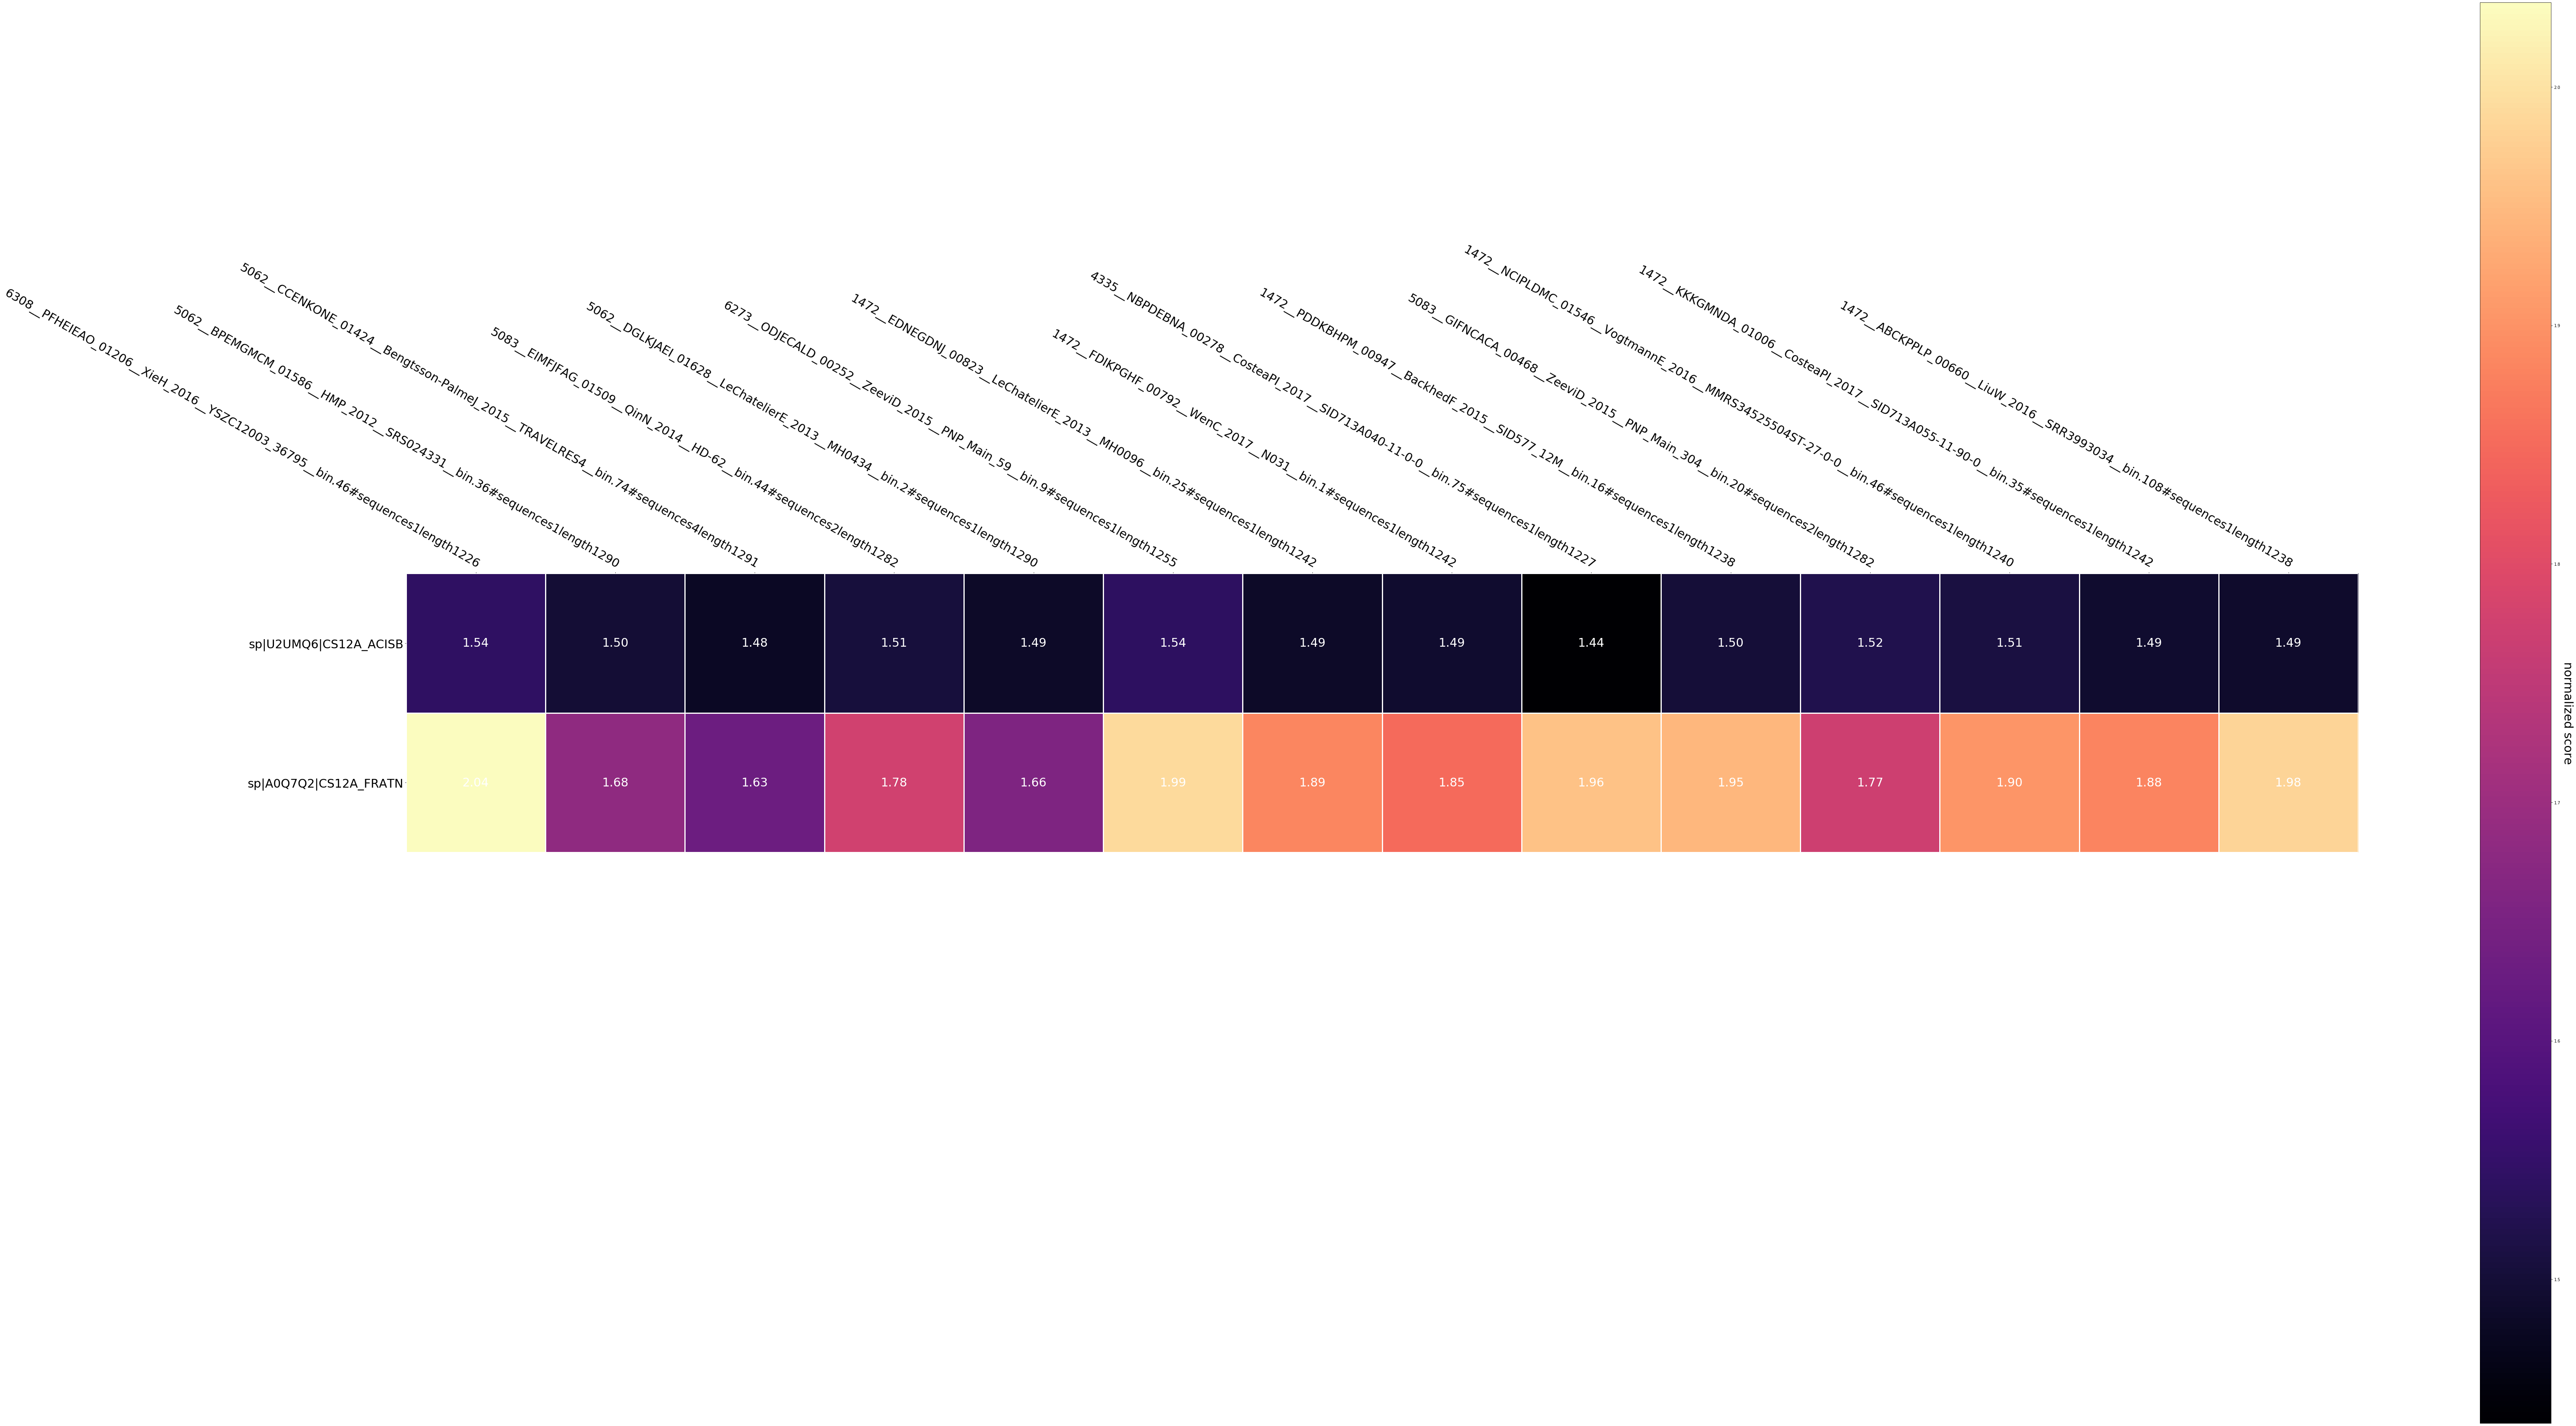

In [16]:
fig, ax = plt.subplots(figsize=(100,50))#300*0.5,200*0.5))
fontsize=30
im, cbar = heatmap(scrmtrx, cols, index, fontsize, ax=ax,
                   cmap="magma", cbarlabel="normalized score")
texts = annotate_heatmap(im, fontsize, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

In [12]:
figname=feature+"_pairwise_scorematrix"
fig.savefig(outpath+identity_score+"_clusters/"+figname+".png", format="png")

# 5 get all information about  every selected locus, using the sequence id from the header of the fasta file " 1aCsfalf5mamusi_centroid"

```
more 1aCsfalf5mamusi_centroid97.faa | grep ">" 
for seqid in FDIKPGHF_00792 EDNEGDNJ_00823 ODJECALD_00252 PFHEIEAO_01206 NBPDEBNA_00278 PDDKBHPM_00947 N
CIPLDMC_01546 KKKGMNDA_01006 ABCKPPLP_00660; do
 get_ID_info $seqid -f Cpf1
done
```